1.Loading necessay packages

In [1]:
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

2.loading the file

In [22]:
df = pd.read_csv(r"D:\Experiment\Codesoft\Bank Customer Churn Prediction\churn\Churn_Modelling.csv",index_col=0)

3.EDA

In [23]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [25]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [28]:
df.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

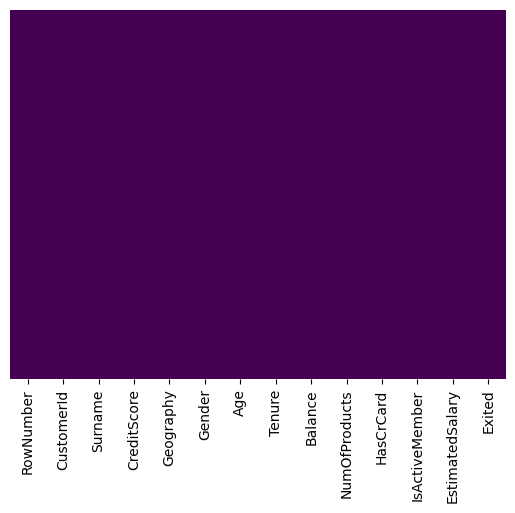

In [16]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df.drop(columns=['CustomerId', 'Surname', 'Geography'],axis=1,inplace=True)

In [30]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0


Converting categorical values to numerical values.

In [31]:
df['Gender'] = pd.Categorical(df['Gender']).codes

In [32]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1
2,608,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,39,1,0.00,2,0,0,93826.63,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0


Analyze the data

In [33]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [34]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

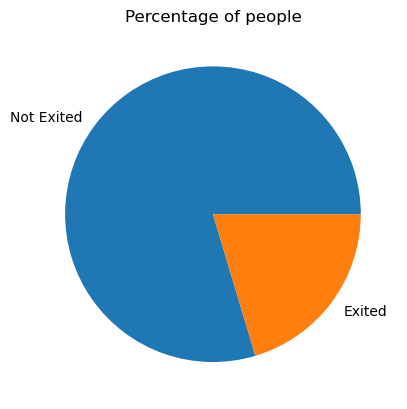

In [36]:
plt.pie(df['Exited'].value_counts(),labels = ['Not Exited','Exited'])
plt.title('Percentage of people')
plt.show()

In [37]:
X,y = df.drop('Exited',axis=1),df['Exited']

In [38]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X.iloc[1:,:], y[1:])

In [39]:
print(X_resampled.shape,y_resampled.shape)

(15926, 9) (15926,)


In [41]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88
2,608,0,41,1,83807.86,1,0,1,112542.58
3,502,0,42,8,159660.80,3,1,0,113931.57
4,699,0,39,1,0.00,2,0,0,93826.63
5,850,0,43,2,125510.82,1,1,1,79084.10


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int8   
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), int8(1)
memory usage: 712.9 KB


In [43]:
print(df.isnull().sum())


CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [45]:
print(X_train.shape,y_train.shape)

(12740, 9) (12740,)


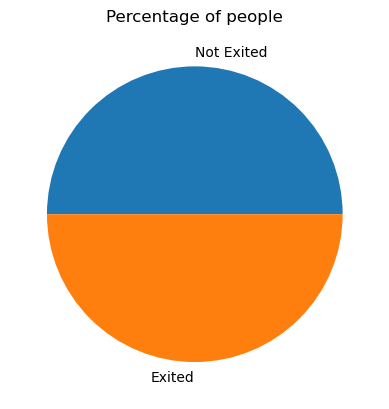

In [46]:
plt.pie(y_resampled.value_counts(),labels = ['Not Exited','Exited'])
plt.title('Percentage of people')
plt.show()

In [47]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()                                #It is making standardized data , x-meu/sigma
X_train_scaled = scaler.fit_transform(X_train)           #Fit calculate mu and sigma , Transform transforms the data
X_test_scaled = scaler.transform(X_test)                 #fit and transform does both fit amd transform 

In [49]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100],
        'max_iter':[1,2,4,7,10,15,20,30]}
grid_search = GridSearchCV(lasso,para,cv=5,scoring="neg_mean_squared_error",n_jobs=11)

In [50]:
y_train.head()

13555    1
1665     1
14878    1
7471     0
2582     0
Name: Exited, dtype: int64

4.Building the Model

In [51]:
grid_search.fit(X_train_scaled,y_train)

c:\Users\Smile\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+02, tolerance: 3.185e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=11,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 45, 50, 55, 100],
                         'max_iter': [1, 2, 4, 7, 10, 15, 20, 30]},
             scoring='neg_mean_squared_error')

In [52]:
Lasso_reg = grid_search.best_estimator_

In [53]:
grid_search.best_params_

{'alpha': 1e-08, 'max_iter': 7}

In [54]:
import joblib

In [55]:
 joblib.dump(Lasso_reg,'Lasso_reg.pkl')

['Lasso_reg.pkl']

5.Prediction

In [56]:
predicted = Lasso_reg.predict(X_test_scaled)

In [57]:
predicted

array([0.44963192, 0.85126587, 0.56434312, ..., 0.14780158, 0.54526958,
       0.48334019])

In [59]:
threshold = 0.5
predicted_labels = (predicted > threshold).astype(int)

f1 = f1_score(y_test, predicted_labels)
acc = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)

print("F1 Score:", f1*100)
print("Accuracy:", acc*100)
print("Recall:", recall*100)

F1 Score: 76.45951035781545
Accuracy: 76.45951035781545
Recall: 78.63137508069723
